In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

dataset = pd.concat(objs=[train, test]).reset_index(drop=True)

dataset = dataset.fillna(np.nan)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


(0, 1)

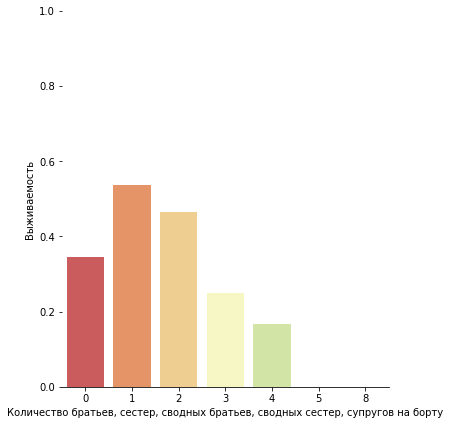

In [96]:
t=sns.color_palette("Blues")
g = sns.factorplot(x="SibSp",y="Survived",data=train, size = 6 , kind="bar",palette="Spectral", ci=None, aspect=0.9)
g.despine(left=True)
g = g.set_ylabels("Выживаемость")
g = g.set_xlabels("Количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту")
plt.ylim(0,1)

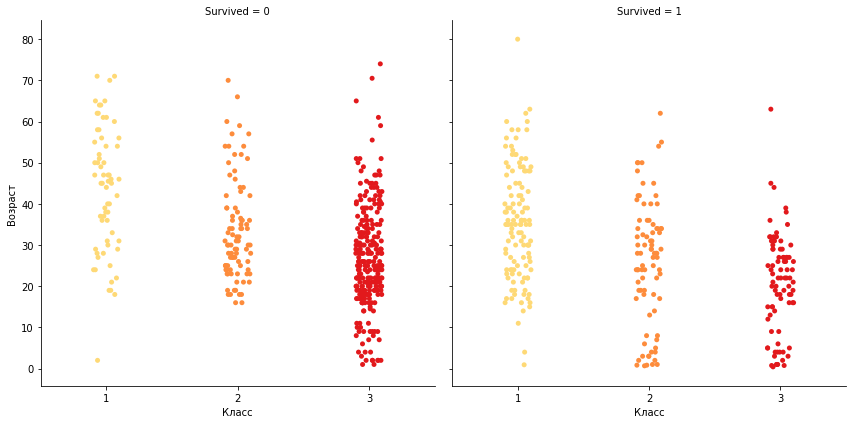

In [97]:
g = sns.factorplot(data=train,x='Pclass',y='Age',col='Survived',kind='strip',jitter=True,palette="YlOrRd",size = 6)
g = g.set_ylabels("Возраст")
g=g.set_xlabels("Класс")

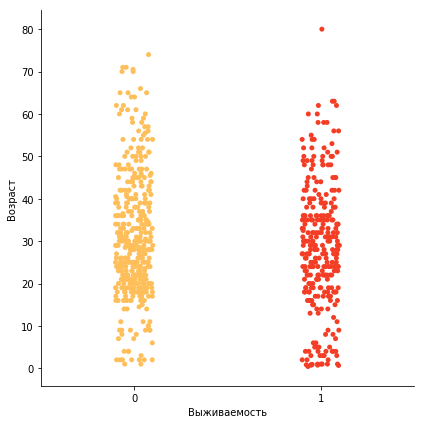

In [98]:
g = sns.factorplot(data=train,x='Survived',y='Age',kind='strip',jitter=True, palette="YlOrRd",size = 6)
g = g.set_ylabels("Возраст")
g=g.set_xlabels("Выживаемость")

(0, 1)

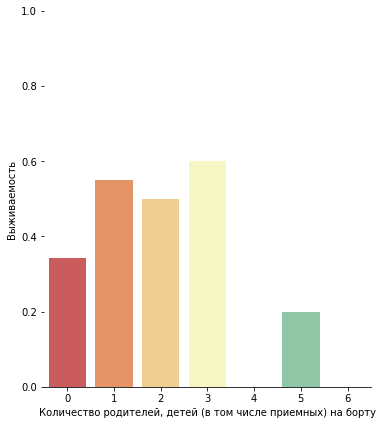

In [99]:

g = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 ,palette="Spectral",ci=None, aspect=0.9 )
g.despine(left=True)
g = g.set_ylabels("Выживаемость")
g=g.set_xlabels("Количество родителей, детей (в том числе приемных) на борту")
plt.ylim(0,1)


(0, 1)

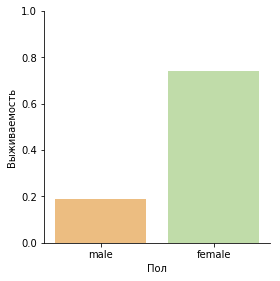

In [100]:
g = sns.factorplot(x="Sex",y="Survived",kind="bar",data=train,palette="Spectral",ci=None)
g = g.set(xlabel="Пол", ylabel="Выживаемость")
plt.ylim(0,1)

(0, 1)

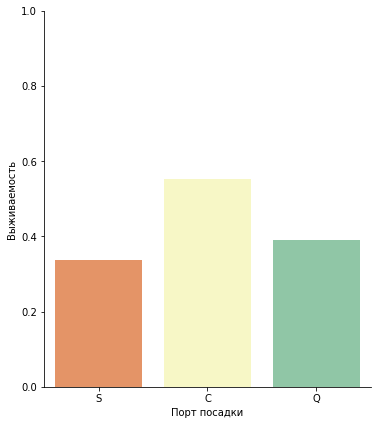

In [101]:
g = sns.factorplot( x="Embarked",y="Survived",data=train,kind="bar", size = 6 ,palette="Spectral",ci=None, aspect=0.9 )
g = g.set_ylabels("Выживаемость")
g=g.set_xlabels("Порт посадки")
plt.ylim(0,1)

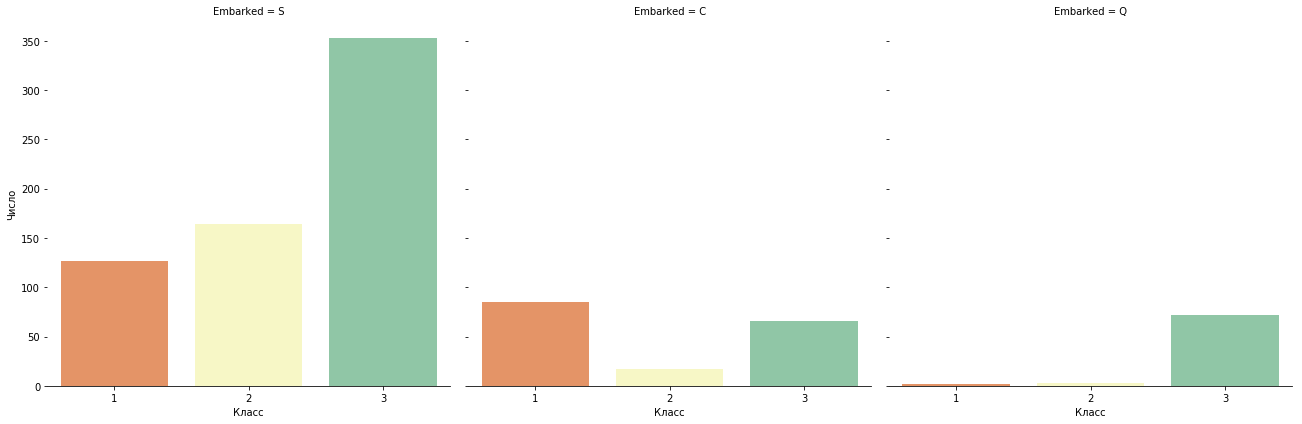

In [102]:
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count",palette="Spectral")
g.despine(left=True)
g = g.set_ylabels("Число")
g = g.set_xlabels("Класс")

(0, 1)

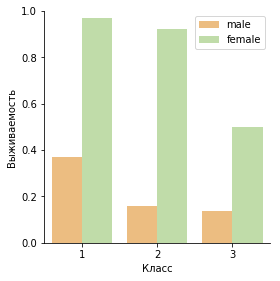

In [103]:
g = sns.factorplot("Pclass", "Survived", "Sex", data=dataset, kind="bar",palette="Spectral",ci=None,legend=False)
plt.legend(loc="best")
g = g.set(xlabel="Класс", ylabel="Выживаемость")
plt.ylim(0,1)

(0, 1)

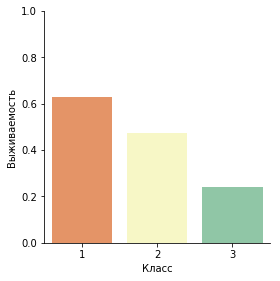

In [104]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar",palette="Spectral",ci=None)
g = g.set(xlabel="Класс", ylabel="Выживаемость")
plt.ylim(0,1)

In [105]:
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [106]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'No' for i in dataset['Cabin'] ])
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

#Удалим PassengerID
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)


# Удалим Ticket
dataset.drop(labels = ["Ticket"], axis = 1, inplace = True)

#Достанем префикс из Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)

#Удалим Name
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

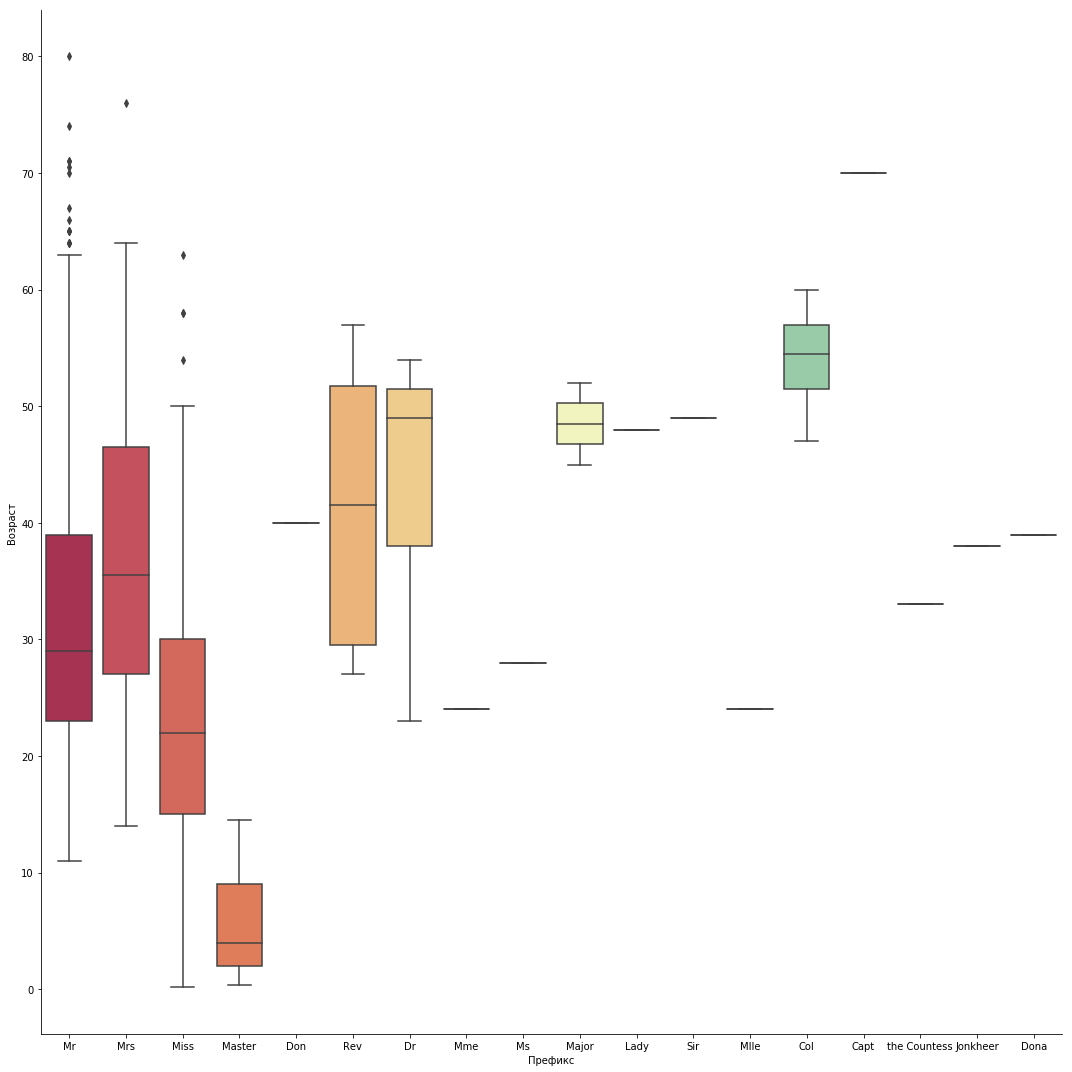

In [107]:
g=sns.factorplot(x="Title",y="Age",data = dataset,kind="box",palette="Spectral",ci=None, size = 15)
g = g.set(xlabel="Префикс", ylabel="Возраст")

In [108]:
def func(dataset,column_name):

    return dataset[column_name].isnull().sum()
#Посмотрим у каких категорий не заполнен возраст
print(dataset.groupby("Title").apply(func, column_name="Age"))

Title
Capt              0
Col               0
Don               0
Dona              0
Dr                1
Jonkheer          0
Lady              0
Major             0
Master            8
Miss             50
Mlle              0
Mme               0
Mr              176
Mrs              27
Ms                1
Rev               0
Sir               0
the Countess      0
dtype: int64


In [109]:
index_age = list(dataset["Age"][dataset["Age"].isnull()].index)
for i in index_age :
   median_age = dataset["Age"].median()
   prediction_age = dataset["Age"][dataset["Title"]==dataset.iloc[i]["Title"]].median()
   if np.isnan(prediction_age):
       dataset["Age"].iloc[i] = median_age
   else:
       dataset["Age"].iloc[i] = prediction_age

C:\Users\Elizabeth\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [110]:
#Сгруппируем Title
dataset["Title"] = dataset["Title"].replace(["Capt", "Col", "Don","Dona", "Dr",
                               "Jonkheer", "Lady", "Major",
                               "Rev", "Sir", "the Countess"], "Aristocratic")
dataset["Title"] = dataset["Title"].replace(["Mlle", "Mme","Mrs"],"Miss")
#Разделим признаки на колонки с 0 и 1
dataset = pd.get_dummies(dataset, columns = ["Title"], prefix="Title")

dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

dataset = pd.get_dummies(dataset, columns = ["Pclass"], prefix="Pclass")

(0, 1)

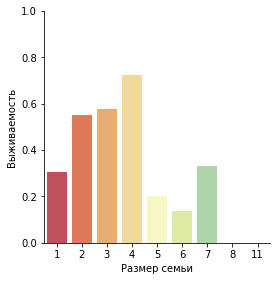

In [111]:
dataset["Familysize"] = dataset["SibSp"] + dataset["Parch"] + 1
g = sns.factorplot(x="Familysize",y="Survived",data = dataset,kind="bar",palette="Spectral",ci=None)
g = g.set(xlabel="Размер семьи", ylabel="Выживаемость")
plt.ylim(0,1)

In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

In [113]:
train = dataset[:len(train)]

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

KFold = StratifiedKFold(n_splits=5)

random_state = 2
algorithms = []
algorithms.append(SVC(kernel="linear", random_state=random_state))
algorithms.append(DecisionTreeClassifier(random_state=random_state))
algorithms.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
algorithms.append(RandomForestClassifier(random_state=random_state))
algorithms.append(GradientBoostingClassifier(random_state=random_state))
algorithms.append(MLPClassifier(random_state=random_state))
algorithms.append(KNeighborsClassifier())
algorithms.append(LogisticRegression(random_state = random_state))
algorithms.append(LinearDiscriminantAnalysis())
algorithms.append(GaussianNB())



results_accuracy = []
results_f1 =[]
for algorithm in algorithms :
    results_accuracy.append(cross_val_score(algorithm, X_train, y = Y_train, scoring = "accuracy", cv = KFold))
    results_f1.append(cross_val_score(algorithm,X_train,y= Y_train,scoring="f1",cv = KFold))
    

means_accuracy = []
means_f1 = []
for res in results_accuracy:
    means_accuracy.append(res.mean())
for res in results_f1:
    means_f1.append(res.mean())
Final = pd.DataFrame({"Accuracy":means_accuracy,"F-мера":means_f1, "Algorithm":["SVCLinear","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LDA","Naive Bayes"]})


C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

,Accuracy,Algorithm,F-мера
0,0.822721,SVCLinear,0.758496
1,0.780024,DecisionTree,0.714057
2,0.781135,AdaBoost,0.707307
3,0.801417,RandomForest,0.730037
4,0.827222,GradientBoosting,0.761729
5,0.748746,MultipleLayerPerceptron,0.615605
6,0.722871,KNeighboors,0.616354
7,0.826092,LogisticRegression,0.764116
8,0.827222,LDA,0.766817
9,0.763384,Naive Bayes,0.671271


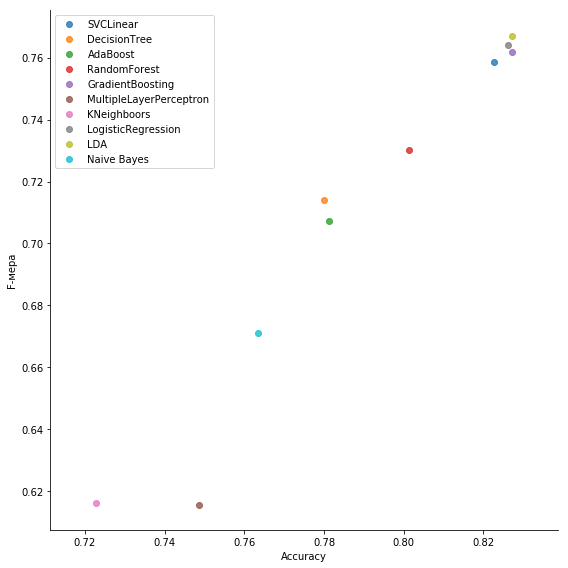

In [93]:
sns.lmplot( x="Accuracy", y="F-мера", data=Final, fit_reg=False, hue='Algorithm', legend=False,size =8)
plt.legend(loc="best")
Final